In [47]:
import warnings
warnings.filterwarnings('ignore')


from sklearn.grid_search import GridSearchCV
# SKLearn Model Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression , Perceptron

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

# SKLearn ensemble classifiers
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier , BaggingClassifier
from sklearn.ensemble import VotingClassifier , AdaBoostClassifier

# SKLearn Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# plot functions
import plotFunctions as pfunc
import dataFunctions as dfunc

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [2]:
full = dfunc.loadData()

In [3]:
full = dfunc.convertSexToNum(full, True)

Process  Sex  : Concluded!


In [4]:
full = dfunc.fillTitles(full)

Process  Title  : Concluded!


In [5]:
#full = dfunc.fillMissingAge(full)
full = dfunc.fillAge(full)

Process  Age  : Concluded!


In [6]:
full = dfunc.fillMissingFare(full)

Process  Fare  : Concluded!


In [7]:
full = dfunc.featureEng(full)

Process  Family  : Concluded!
Process  Ticket group  : Concluded!
Process  Fare  : Concluded!


In [8]:
full = dfunc.fillEmbarked(full)

Process  Embarked  : Concluded!


In [9]:
full = dfunc.fillTitles(full)

Process  Title  : Concluded!


In [10]:
full = dfunc.fillTicket(full)

Process  Ticket  : Concluded!


In [11]:
full = dfunc.fillDeck(full)

Process  Deck  : Concluded!


In [13]:
#print(full.isnull().sum())
full = full.drop('Cabin',1)
full = full.drop('Name',1)
full = full.drop('Title',1)
full = full.drop('TicketType',1)
full = full.drop('Deck',1)
full = full.drop('Survived',1)

In [14]:
train_X, test_X, target_y = pfunc.prepareTrainTestTarget(full)
model = RandomForestClassifier(n_estimators=100, max_features='sqrt')


In [44]:
print(target_y)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [15]:
model.fit( train_X , target_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
features = pd.DataFrame()
features['feature'] = train_X.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)



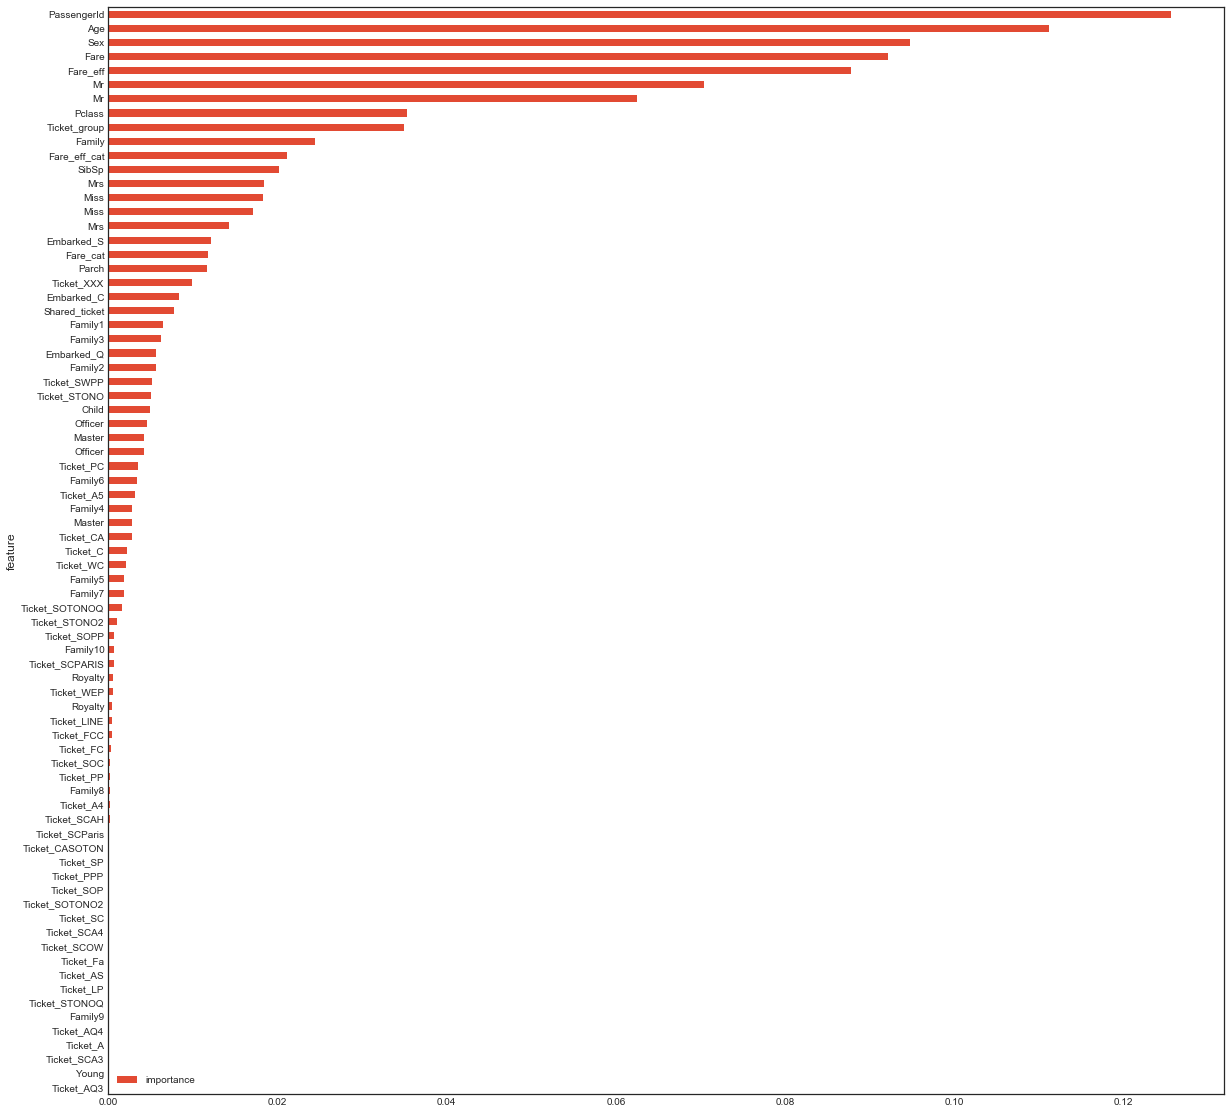

In [17]:
features.plot(kind='barh', figsize=(20, 20))

In [67]:
parameters = {'bootstrap': True,
              'max_depth': 6, 
              'max_features': 'auto', 
              'min_samples_leaf': 1, 
              'min_samples_split': 10, 
              'n_estimators': 100,
              'n_jobs': -1
             }
model = RandomForestClassifier(**parameters)

In [62]:
train_X=train_X.values
test_X=test_X.values
target_y=target_y.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [68]:
#crossv = StratifiedKFold(target_y, n_folds=10)
crossv = KFold(n_splits=10)

print(crossv)
type(train_X)
for train_index, test_index in crossv.split(train_X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train = train_X[train_index]
    X_test = train_X[test_index]
    y_train = target_y[train_index]
    y_test = target_y[test_index]
    model.fit( X_train , y_train )
    
pfunc.calcScore(model, X_test , y_test, scoring='accuracy')
 

KFold(n_splits=10, random_state=None, shuffle=False)


0.85404196766425855

In [69]:
output = model.predict(test_X).astype(int)

In [70]:
print(output)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [71]:
df_out = pd.DataFrame()

In [72]:
print(test_X)

[[34.5 7.8292 0 ..., 0 0 1]
 [47.0 7.0 0 ..., 0 0 1]
 [62.0 9.6875 0 ..., 0 0 1]
 ..., 
 [38.5 7.25 0 ..., 0 0 0]
 [26.0 8.05 0 ..., 0 0 1]
 [4.0 22.3583 1 ..., 0 0 1]]


In [73]:
aux = pd.read_csv('./input/test.csv')

In [75]:
df_out['PassengerId']=aux['PassengerId']

In [79]:
df_out['Survived'] = pd.DataFrame(output.tolist())

In [81]:
print(df_out)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         1
3

In [82]:
df_out[['PassengerId','Survived']].to_csv('./output/output.csv',index=False)